In [1]:
##### Imports #####
import os
import matplotlib.pyplot as plt
import pysam
import statistics

In [16]:
reads_alignement_prefix = "../outputs/zymo/" #"../outputs/salad-irg/" #
contigs_alignement_prefix = "../outputs/zymo/metaMDBG/" #"../outputs/salad-irg/metaMDBG/" #
references_prefix = "/groups/genscale/nimauric/ZymoD6331/" #"/groups/genscale/nimauric/soil_references/" #
references = [p.split(".")[1] for p in os.listdir(reads_alignement_prefix) if p.endswith(".bam")]

theorical_composition={ #Genomic DNA
    "Akkermansia_muciniphila" : 1.5,
    "Bacteroides_fragilis" : 14,
    "Bifidobacterium_adolescentis" : 6,
    "Candida_albican" :1.5,
    "Clostridioides_difficile" : 1.5,
    "Clostridium_perfringens" :0.0001,
    "Enterococcus_faecalis" :0.001,
    "Escherichia_coli_B1109" :2.8,
    "Escherichia_coli_B3008" :2.8,
    "Escherichia_coli_B766" :2.8,
    "Escherichia_coli_JM109" :2.8,
    "Escherichia_coli_b2207" :2.8,
    "Faecalibacterium_prausnitzii" :14,
    "Fusobacterium_nucleatum" :6,
    "Lactobacillus_fermentum" :6,
    "Methanobrevibacter_smithii" :0.1,
    "Prevotella_corporis" :6,
    "Roseburia_hominis" :14,
    "Saccharomyces_cerevisiae" :1.4,
    "Salmonella_enterica" :0.01,
    "Veillonella_rogosae" :14,
}

theorical_composition={ #Genome Copy
    "Akkermansia_muciniphila" : 1.62 ,
    "Bacteroides_fragilis" :8.33  ,
    "Bifidobacterium_adolescentis" :8.83  ,
    "Candida_albican" :0.31 ,
    "Clostridioides_difficile" : 1.10 ,
    "Clostridium_perfringens" :0.00009 ,
    "Enterococcus_faecalis" :0.0011 ,
    "Escherichia_coli_B1109" :1.77,
    "Escherichia_coli_B3008" :1.82 ,
    "Escherichia_coli_B766" :1.66,
    "Escherichia_coli_JM109" :1.82,
    "Escherichia_coli_b2207" :1.64,
    "Faecalibacterium_prausnitzii" :14.77 ,
    "Fusobacterium_nucleatum" :7.53,
    "Lactobacillus_fermentum" :9.68 ,
    "Methanobrevibacter_smithii" :0.17 ,
    "Prevotella_corporis" :6.26,
    "Roseburia_hominis" :12.43 ,
    "Saccharomyces_cerevisiae" :0.32,
    "Salmonella_enterica" :0.007 ,
    "Veillonella_rogosae" :19.94 ,
}

In [3]:
# Estimate the median coverage

coverage_depth = {}
def get_coverage_count(path) : 

    bamfile = pysam.AlignmentFile(path, "rb")
    coverage_count=[]

    for pileupcolumn in bamfile.pileup():
        coverage_count.append(pileupcolumn.nsegments)
    bamfile.close()


    return coverage_count

def calculate_median_coverage_depth(coverage_count, ref_length):
    sorted_list = sorted(coverage_count)
    list_length = len(coverage_count)
    median_index = (list_length - (ref_length - list_length) -1) / 2

    if(median_index < 0.5) : 
        return 0
    elif (median_index == int(median_index)) :
        return sorted_list[int(median_index)]
    else : 
        return sorted_list[int(median_index -0.5)]/2 + sorted_list[int(median_index +0.5)]/2
    

for r in references : 
    # Get reference genome length
    ref_genome = pysam.FastaFile(references_prefix + r + ".fasta")
    ref_length = 0
    for seq_length in ref_genome.lengths:
        ref_length += seq_length
    ref_genome.close()

    coverage_count = get_coverage_count(reads_alignement_prefix + "reads_on_reference." + r + ".bam")
    

    average_coverage_depth = sum(coverage_count) / ref_length
    median_coverage_depth = calculate_median_coverage_depth(coverage_count, ref_length)

    coverage_depth[r] = [average_coverage_depth, median_coverage_depth]

for r in coverage_depth.keys() : 
    print(r, coverage_depth[r][0] , coverage_depth[r][1])



[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Bifidobacterium_adolescentis.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Bifidobacterium_adolescentis.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Faecalibacterium_prausnitzii.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Faecalibacterium_prausnitzii.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Salmonella_enterica.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Salmonella_enterica.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/reads_on_reference.Escherichia_coli_b2207.bam.bai
[W::hts_idx_load3] The index file is older than the data file: ../outputs/zymo/

Bifidobacterium_adolescentis 174.4138253148262 172
Faecalibacterium_prausnitzii 923.1740373792005 865.0
Salmonella_enterica 261.8789838785515 3.0
Escherichia_coli_b2207 585.5594010476126 652
Methanobrevibacter_smithii 6.13081978890112 6.0
Veillonella_rogosae 1616.0607949806306 1619.0
Escherichia_coli_JM109 633.8324379979167 657.0
Escherichia_coli_B1109 613.9992037643364 656
Candida_albican 3.113866484893585 3.0
Enterococcus_faecalis 13.506036426615383 0
Clostridioides_difficile 118.41979943503496 112.0
Saccharomyces_cerevisiae 3.2696797892513123 3.0
Prevotella_corporis 532.9684826295636 493
Bacteroides_fragilis 741.2921375931837 753.0
Escherichia_coli_B3008 630.3833013698544 657
Clostridium_perfringens 10.641317188036135 0
Fusobacterium_nucleatum 322.3800340333618 322.0
Roseburia_hominis 285.1162237978295 273
Escherichia_coli_B766 583.3870280271706 651.0
Akkermansia_muciniphila 129.1866550002104 129.0
Lactobacillus_fermentum 101.45847628734714 83


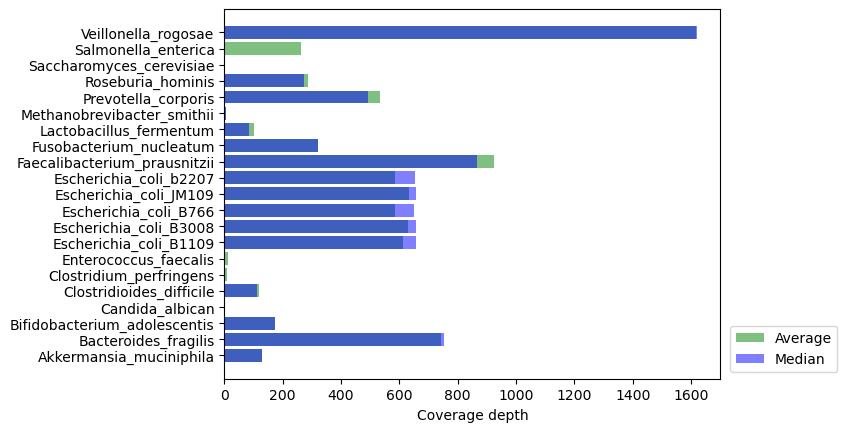

In [4]:
coverage_depth = dict(sorted(coverage_depth.items()))
average_coverage_depth = [tup[0] for tup in coverage_depth.values()]
median_coverage_depth = [tup[1] for tup in coverage_depth.values()]
reference_names = list(coverage_depth.keys())

# Creating barplots
plt.barh(reference_names, average_coverage_depth, color='green', label="Average", alpha=0.5)
plt.barh(reference_names, median_coverage_depth, color='blue', label="Median", alpha=0.5)

plt.xlabel("Coverage depth")
#plt.xlim(right=1)

plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0))

In [21]:

backup = coverage_depth.copy()

del coverage_depth["Escherichia_coli_b2207"] 
del coverage_depth["Escherichia_coli_JM109"] 
del coverage_depth["Escherichia_coli_B1109"] 
del coverage_depth["Escherichia_coli_B3008"]
del coverage_depth["Escherichia_coli_B766"]


coverage_depth
sums=[0,0, 0]
for k in coverage_depth.keys() : 
    coverage_depth[k] = [ coverage_depth[k][0], coverage_depth[k][1], theorical_composition[k]]
    sums[0] +=coverage_depth[k][0]
    sums[1] +=coverage_depth[k][1]
    sums[2] +=coverage_depth[k][2]

proportion = {}
for k in coverage_depth.keys() : 
    proportion[k] = [coverage_depth[k][0]*100 / sums[0], coverage_depth[k][1]*100 / sums[1],  coverage_depth[k][2]*100 / sums[2]]





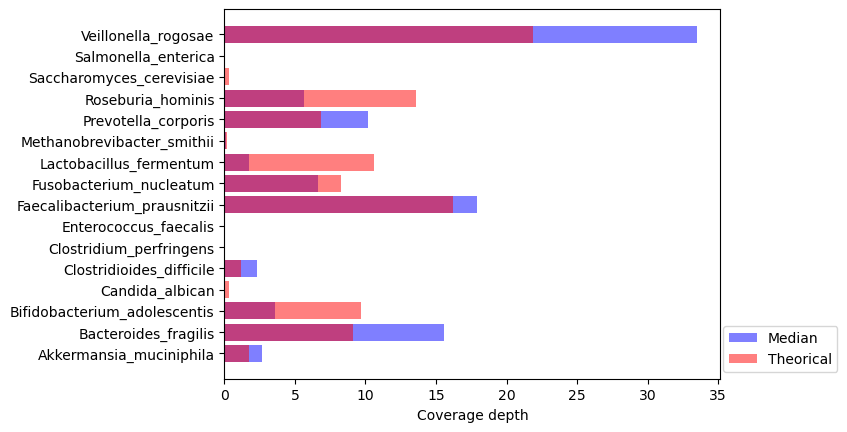

In [22]:
proportion = dict(sorted(proportion.items()))
average_coverage_depth = [tup[0] for tup in proportion.values()]
median_coverage_depth = [tup[1] for tup in proportion.values()]
theorical = [tup[2] for tup in proportion.values()]
reference_names = list(proportion.keys())

# Creating barplots
#plt.barh(reference_names, average_coverage_depth, color='green', label="Average", alpha=0.5)
plt.barh(reference_names, median_coverage_depth, color='blue', label="Median", alpha=0.5)
plt.barh(reference_names, theorical, color='red', label="Theorical", alpha=0.5)

plt.xlabel("Coverage depth")
#plt.xlim(right=1)

plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0))